In [1]:
import tensorflow
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import argparse

2023-10-09 14:44:20.664588: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-09 14:44:20.853927: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-09 14:44:20.897056: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-09 14:44:20.897087: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not ha

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

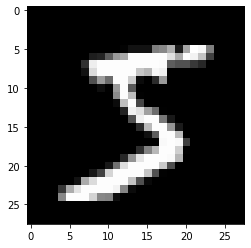

In [4]:
plt.imshow(x_train[0], cmap="gray")

In [5]:
y_train[0]

5

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
# converting it in the range of 0 to 1

x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [8]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [9]:
# reshaping the training and testing data from 2D to 1D

x_train = x_train.reshape((x_train.shape[0], 1*28*28))
x_test = x_test.reshape((x_test.shape[0], 1*28*28))
xtest=x_test.reshape((x_test.shape[0],28,28))

In [10]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 784), (60000,)), ((10000, 784), (10000,)))

In [11]:
model = Sequential()

2023-10-09 14:44:32.148774: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-10-09 14:44:32.148916: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-10-09 14:44:32.148926: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (student): /proc/driver/nvidia/version does not exist
2023-10-09 14:44:32.149225: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
#first layer
model.add(Dense(256, input_shape=(784,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
#last layer
model.add(Dense(10, activation='sigmoid'))


In [13]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 238,314
Trainable params: 238,314
Non-trainable params: 0
_________________________________________________________________


In [15]:
trained_MNIST = model.fit(x_train, y_train, validation_split = 0.1, epochs=30)

Epoch 1/30
1688/1688 [==============================] - 3s 2ms/step - loss: 0.6694 - accuracy: 0.8153 - val_loss: 0.2696 - val_accuracy: 0.9230
Epoch 2/30
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2736 - accuracy: 0.9201 - val_loss: 0.1915 - val_accuracy: 0.9465
Epoch 3/30
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2127 - accuracy: 0.9381 - val_loss: 0.1641 - val_accuracy: 0.9545
Epoch 4/30
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1740 - accuracy: 0.9486 - val_loss: 0.1332 - val_accuracy: 0.9623
Epoch 5/30
1688/1688 [==============================] - 2s 1ms/step - loss: 0.1485 - accuracy: 0.9564 - val_loss: 0.1236 - val_accuracy: 0.9668
Epoch 6/30
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1281 - accuracy: 0.9625 - val_loss: 0.1093 - val_accuracy: 0.9693
Epoch 7/30
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1136 - accuracy: 0.9663 - val_loss: 0.1067 - val_accuracy:

In [16]:
test_loss, accuracy = model.evaluate(x_test, y_test)
print(test_loss)
print(accuracy)

313/313 [==============================] - 0s 523us/step - loss: 0.0735 - accuracy: 0.9781
0.07349995523691177
0.9781000018119812


In [17]:
y_pred = model.predict(x_test)

313/313 [==============================] - 0s 430us/step


In [18]:
y_pred

array([[1.4863758e-01, 9.4600357e-02, 9.8759747e-01, ..., 9.9999994e-01,
        5.7937622e-01, 9.5436132e-01],
       [9.3989772e-01, 9.9964553e-01, 1.0000000e+00, ..., 5.7886174e-04,
        9.9134469e-01, 2.0869309e-06],
       [4.1509204e-02, 9.9996030e-01, 7.3901147e-01, ..., 9.1466659e-01,
        9.2929018e-01, 2.6943278e-02],
       ...,
       [7.8683166e-05, 6.4728723e-04, 1.9064569e-07, ..., 9.9777257e-01,
        9.8508090e-01, 9.9913353e-01],
       [5.0203665e-03, 5.5007309e-02, 9.2836191e-05, ..., 3.9552644e-02,
        9.9992657e-01, 2.0078400e-03],
       [9.9406314e-01, 3.7734038e-03, 9.8050731e-01, ..., 3.1264226e-05,
        2.9761910e-03, 2.3940069e-04]], dtype=float32)

In [19]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

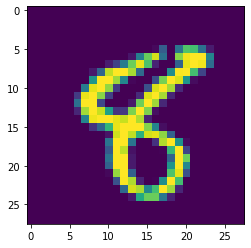

In [20]:
import random 
for i in range(0,9):
    r =random.randint(0,100)
#r=0
plt.imshow(xtest[r])

In [21]:
pred = np.argmax(y_pred, axis=1)

In [22]:
pred

array([7, 2, 1, ..., 4, 5, 6])

In [23]:
print("\n The Classification report is \n")
print(classification_report(y_test, pred))
print("\n The Confusion Matrix is \n")
print(confusion_matrix(y_test, pred))


 The Classification report is 

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.95      0.96       892
           6       0.97      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


 The Confusion Matrix is 

[[ 969    0    0    1    1    2    4    1    2    0]
 [   0 1126    2    1    0    1    3    0    2    0]
 [   4    1 1006    2    4    0    4    4    7    0]
 [   0    0    8  980

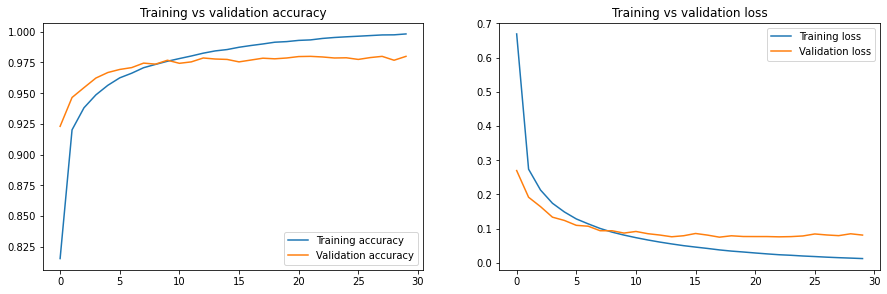

In [24]:
accuracy = trained_MNIST.history['accuracy']
val_accuracy  = trained_MNIST.history['val_accuracy']

loss = trained_MNIST.history['loss']
val_loss = trained_MNIST.history['val_loss']

plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()